# Simple Model

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = [str(i) for i in range(10)]

In [4]:
data = {
    "train_labels": train_labels,
    "test_labels": test_labels,
    "train_images": train_images,
    "test_images": test_images,
}

## type

In [5]:
for key in data:
    print(f"{key} : {type(data[key])}")

train_labels : <class 'numpy.ndarray'>
test_labels : <class 'numpy.ndarray'>
train_images : <class 'numpy.ndarray'>
test_images : <class 'numpy.ndarray'>


## shape

In [6]:
for key in data:
    print(f"{key} : {data[key].shape}")

train_labels : (60000,)
test_labels : (10000,)
train_images : (60000, 28, 28)
test_images : (10000, 28, 28)


In [7]:
for key in data:
    print(f"{key} : {data[key].min()}, {data[key].max()}")

train_labels : 0, 9
test_labels : 0, 9
train_images : 0, 255
test_images : 0, 255


## labels

In [8]:
print(f"trail_labels : {np.unique(train_labels)}")
print(f"trail_labels : {np.unique(test_labels)}")

trail_labels : [0 1 2 3 4 5 6 7 8 9]
trail_labels : [0 1 2 3 4 5 6 7 8 9]


## sample

In [9]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

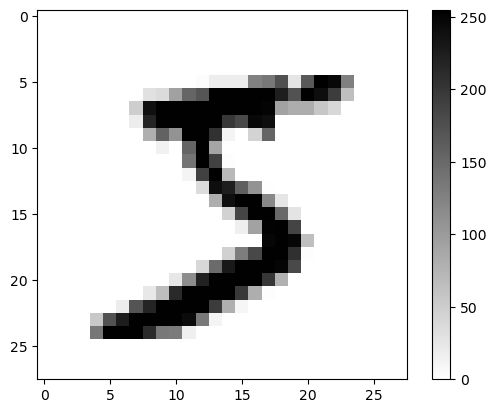

In [10]:
plt.imshow(train_images[0,:,:], cmap=plt.cm.binary)
plt.colorbar()
train_labels[0]

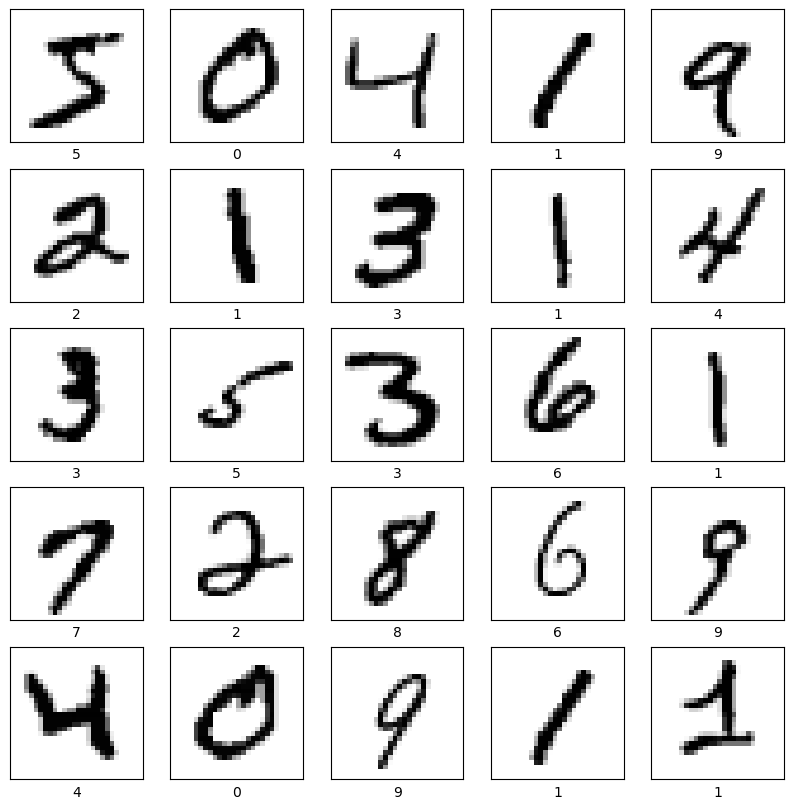

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

# Process Data

In [12]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [13]:
print(train_images_norm.dtype)
print(f"{train_images_norm.min()} ~ {train_images_norm.max()}")

float64
0.0 ~ 1.0


([], [])

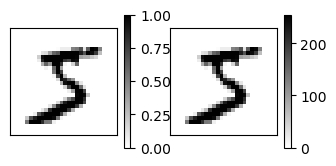

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(5,5,1)
plt.imshow(train_images_norm[0], cmap=plt.cm.binary)
plt.yticks([])
plt.xticks([])
plt.subplot(5,5,2)
plt.colorbar()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.yticks([])
plt.xticks([])

# Build the Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

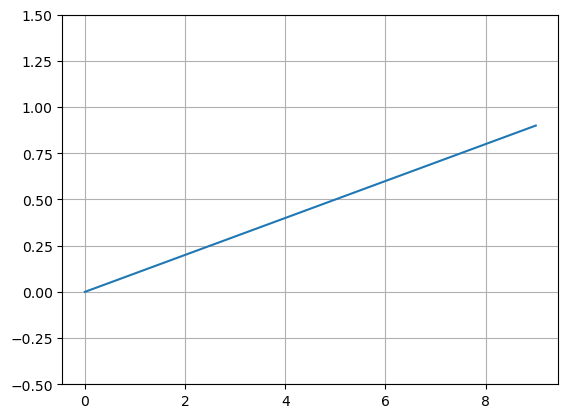

In [16]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(0,1,0.1)
plt.ylim(-0.5,1.5)
plt.grid()
plt.plot(relu(x))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [18]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
)

# fit

In [19]:
model.fit(
    train_images_norm,
    train_labels,
    epochs=5
)

Epoch 1/5


2024-08-09 15:30:33.334213: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9864


# evaluate

In [20]:
model.evaluate(
    test_images_norm,
    test_labels,
    verbose=2
)

313/313 - 0s - loss: 0.0858 - sparse_categorical_accuracy: 0.9721 - 258ms/epoch - 825us/step


[0.08577950298786163, 0.972100019454956]

# predict

In [21]:
raw_predictions = model.predict(test_images_norm)

313/313 [==============================] - 0s 425us/step


In [22]:
raw_predictions.shape

(10000, 10)

In [23]:
raw_predictions[0]

array([ -3.2316444,  -5.3850865,   1.8532308,   2.8626544,  -9.904333 ,
        -6.0059757, -13.731539 ,  13.239115 ,  -3.891539 ,  -2.3685424],
      dtype=float32)

In [24]:
raw_predictions[0].sum()

-26.563658

In [25]:
np.argmax(raw_predictions[0])

7

In [26]:
test_labels[0]

7

In [27]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [28]:
predictions = prob_model.predict(test_images_norm)

313/313 [==============================] - 0s 433us/step


In [29]:
print(predictions[0])
print(predictions.shape)
print(predictions[0].sum())
print(np.argmax(predictions[0]))

[7.0278411e-08 8.1581897e-09 1.1354153e-05 3.1156025e-05 8.8901629e-11
 4.3847499e-09 1.9354208e-12 9.9995720e-01 3.6327304e-08 1.6659499e-07]
(10000, 10)
1.0
7


In [30]:
np.argsort(predictions[0])

array([6, 4, 5, 1, 8, 0, 9, 2, 3, 7])

# verify model

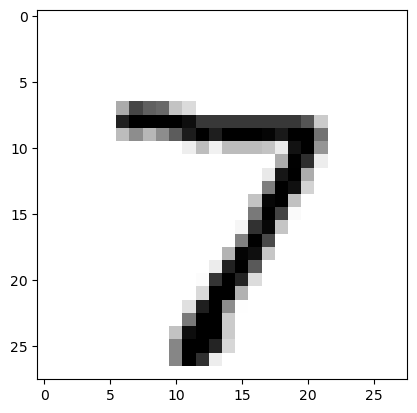

In [31]:
plt.imshow(test_images_norm[0], plt.cm.binary)

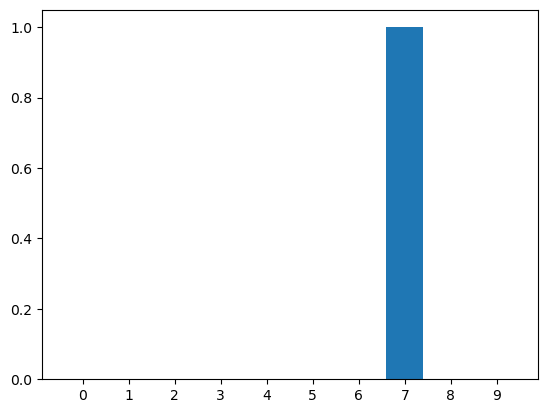

In [32]:
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.show()

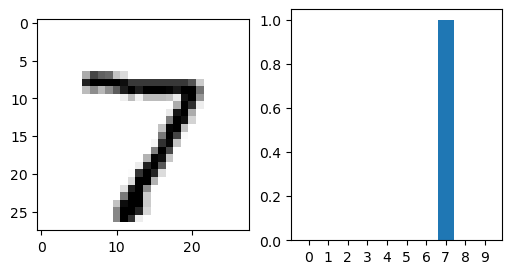

In [33]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.show()

In [34]:
def verify_prediction(i):
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    plt.imshow(test_images_norm[i], cmap=plt.cm.binary)
    
    plt.subplot(1,2,2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.show()

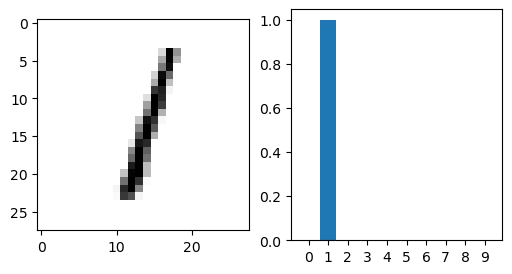

In [35]:
verify_prediction(2)

# save and load the model

In [36]:
prob_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
)

prob_model.save("../saved_models/simlpe_model.h5")

In [37]:
loaded_model = tf.keras.models.load_model("../saved_models/simlpe_model.h5")

In [38]:
loaded_model.evaluate(
    test_images_norm,
    test_labels,
    verbose=1
)

313/313 [==============================] - 0s 1ms/step - loss: 0.0858 - sparse_categorical_accuracy: 0.9721


[0.08577950298786163, 0.972100019454956]

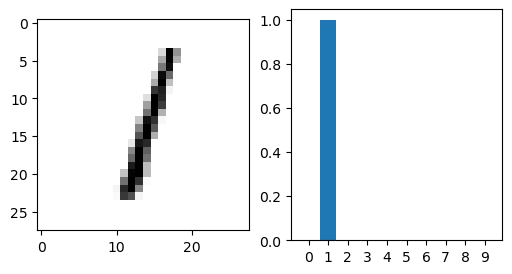

In [39]:
verify_prediction(2)